In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, how='left',on = 'city')

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
#Group the combined data by city
groupedby_city = combined_data.groupby(['city'])

#Average Fare ($) Per City
avg_fare = groupedby_city['fare'].mean()
#print(avg_fare)

#Total Number of Rides Per City
total_rides = groupedby_city['ride_id'].count()
#print(total_rides)

#Total Number of Drivers Per City
drivers_count = groupedby_city['driver_count'].mean()
#print(drivers_per_city)

#City Type (Urban, Suburban, Rural)
city_type = groupedby_city['type'].unique()
#print(city_type)

## Bubble Plot of Ride Sharing Data

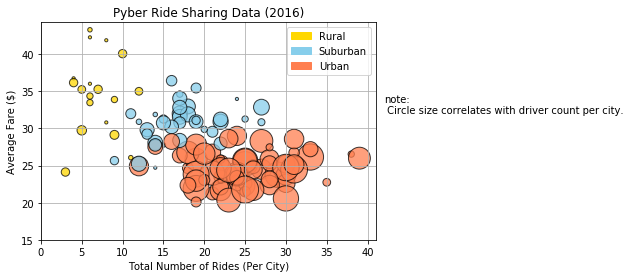

In [5]:
area = drivers_count * 10
color ={'Rural':'gold','Suburban':'skyblue','Urban':'coral'}

sct = plt.scatter(total_rides, avg_fare, s=area, linewidths=1, alpha=0.75,
                  edgecolors='black', c=[color[i[0]] for i in city_type])

# Create a legend
labels = [0, 1, 2]
key = {0: ('gold', 'Rural'), 1: ('skyblue', 'Suburban'), 2: ('coral', 'Urban')}
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles = patches,labels=[label for _, label in key.values()])

plt.xlim(0, max(total_rides)+2)
plt.ylim(15, max(avg_fare) +1)

#plt.legend("City Types",bbox_to_anchor=(1, 1))
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
plt.text(42,32,"note:\n Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyber_bubble_plot.png")

#syntax for scatter plot
plt.grid(True)

In [6]:
# Show plot
plt.show()

## Total Fares by City Type

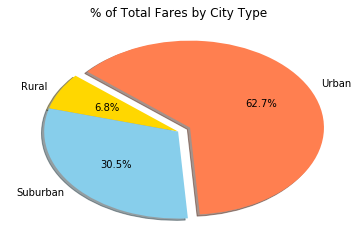

In [7]:
# Calculate Type Percents
city_by_type = combined_data.groupby(['type'])
fare_by_city = city_by_type['fare'].sum()

# Build Pie Chart
explode = (0,0,0.1)
labels = ["Rural", "Suburban", "Urban"]
color =['gold','skyblue','coral']
plt.pie(fare_by_city, explode=explode, labels=labels, colors=color,autopct="%1.1f%%",shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("total_fares_by_city_type.png")

# Show Figure
plt.show()

## Total Rides by City Type

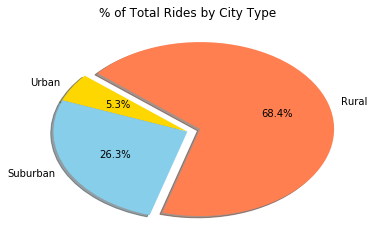

In [8]:
# Calculate Ride Percents
city_by_type = combined_data.groupby(['type'])
rides_by_city = city_by_type['ride_id'].count()

# Build Pie Chart
explode = (0,0,0.1)
labels = ["Urban", "Suburban", "Rural"]
color =['gold','skyblue','coral']
plt.pie(rides_by_city, explode=explode, labels=labels, colors=color,autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("total_rides_by_city_type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

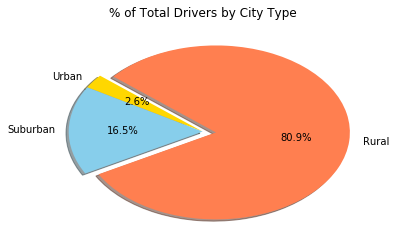

In [9]:
# Calculate Driver Percents
city_by_type = city_data.groupby(['type'])
drivers_by_city = city_by_type['driver_count'].sum()

# Build Pie Charts
explode = (0,0,0.1)
labels = ["Urban", "Suburban", "Rural"]
color =['gold','skyblue','coral']
plt.pie(drivers_by_city, explode=explode, labels=labels, colors=color,autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("total_drivers_by_city_type.png")

# Show Figure
plt.show()